# Simulation and Statistical Inference Project

This notebook contains four simulation-based problems designed to explore key concepts in statistical inference, using Python (NumPy, SciPy, Matplotlib). Each problem focuses on understanding core ideas through Monte Carlo simulation and visualization.

-
**Next Step:**  
Begin implementing **Problem 1** — set up your imports, initialize the random generator, and outline the simulation logic for the Lady Tasting Tea extension.


## Problem 1 — Extending the Lady Tasting Tea

**Objective:**  
Extend the classic Lady Tasting Tea experiment by increasing the number of cups. Simulate random guessing to estimate the probability of correctly identifying all cups by chance in both the original and extended setups.

**Key Concepts:**  
- Combinatorics and probability by chance  
- Simulation using random sampling  
- Interpretation of p-values and significance levels

**Steps:**  
1. Describe the original experiment (8 cups: 4 tea-first, 4 milk-first).  
2. Extend it to 12 cups (8 tea-first, 4 milk-first).  
3. Simulate many random guesses.  
4. Estimate and compare the probabilities.  
5. Discuss implications for statistical significance.

https://docs.python.org/3/library/math.html#math.comb

In [281]:
# Simulation and Statistical Inference Project
# Problem 1 — Extending the Lady Tasting Tea

# Import libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools
import random







In the original *Lady Tasting Tea* experiment:

- There are **8 cups** of tea: **4 prepared with milk poured first** and **4 with tea poured first**.  
- The lady’s task is to **correctly identify the 4 cups with milk poured first**.  
- If she is **just guessing randomly**, there are  
  \[
  C(8, 4) = 70
  \]
  possible ways to choose 4 cups out of 8.  

This means that, by chance alone, the probability of her selecting all four correct cups is  
\[
\frac{1}{70} \approx 0.0143
\].


In [282]:
# Cups of Tea

# Numbers of cups in total
no_cups = 8

# Number of cups of tea with milk in first
no_cups_milk_first = 4

# Number of cups of tea with tea first
no_cups_tea_first = 4

In [ ]:
def setup_experiment(total_cups, milk_first):
    # Set up the Lady Tasting Tea experiment.
    tea_first = total_cups - milk_first

    # Create a list of cup labels (1, 2, 3, ..., total_cups)
    labels = list(range(1, total_cups + 1))

    # Print summary
    print("Total cups:", total_cups)
    print("Milk first:", milk_first)
    print("Tea first:", tea_first)
    print("Cup labels:", labels)

    return total_cups, milk_first, tea_first, labels


# Example 1: Original experiment (8 cups)
no_cups, no_cups_milk_first, no_cups_tea_first, labels = setup_experiment(8, 4)

# Example 2: Extended experiment (12 cups)
no_cups, no_cups_milk_first, no_cups_tea_first, labels = setup_experiment(12, 4)



Total cups: 8
Milk first: 4
Tea first: 4
Cup labels: [1, 2, 3, 4, 5, 6, 7, 8]
Total cups: 12
Milk first: 4
Tea first: 8
Cup labels: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [284]:
#Calculate the number of ways to choose k elements from a set of n elements where the order of the chosen elements does not matter and no element is selected more than once.

1 # Number of ways of selecting four cups from eight.


ways = math.comb(no_cups, no_cups_milk_first)

print(ways)


495


In [285]:
# Total number of ways of selecting four cups from eight, keeping them in mind the order.

# ways_ordered = math.perm(8, 4)
ways_ordered = 8 * 7 * 6 * 5 * 4 * 3 * 2 * 1 // (4 * 3 * 2 * 1 * 4 * 3 * 2 * 1)

print(ways_ordered)

70


In [286]:
1 # No of ways of shuffling four cups.

no_shuffles = 4 * 3 * 2 * 1

print(no_shuffles)

24


In [287]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [288]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 3, 8),
 (0, 1, 3, 9),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 4, 8),
 (0, 1, 4, 9),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 5, 8),
 (0, 1, 5, 9),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 6, 7),
 (0, 1, 6, 8),
 (0, 1, 6, 9),
 (0, 1, 6, 10),
 (0, 1, 6, 11),
 (0, 1, 7, 8),
 (0, 1, 7, 9),
 (0, 1, 7, 10),
 (0, 1, 7, 11),
 (0, 1, 8, 9),
 (0, 1, 8, 10),
 (0, 1, 8, 11),
 (0, 1, 9, 10),
 (0, 1, 9, 11),
 (0, 1, 10, 11),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 3, 8),
 (0, 2, 3, 9),
 (0, 2, 3, 10),
 (0, 2, 3, 11),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 4, 8),
 (0, 2, 4, 9),
 (0, 2, 4, 10),
 (0, 2, 4, 11),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 5, 8),
 (0, 2, 5, 9),
 (0, 2, 5, 10),
 (

In [289]:
# Initialize random generator
# every time we run the notebook, we’ll get exactly the same random results.
# It initializes the random generator so results can be repeated consistently
rng = np.random.default_rng(seed=42)  # for reproducibility

In [290]:
# Number of combinations.
len(combs)

495

In [291]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[3, 7, 8, 9]

In [292]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{3, 7, 8, 9}

In [293]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

# Loop through the combinations.
for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, len(overlap), overlap)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3) 1 {3}
(0, 1, 2, 4) 0 set()
(0, 1, 2, 5) 0 set()
(0, 1, 2, 6) 0 set()
(0, 1, 2, 7) 1 {7}
(0, 1, 2, 8) 1 {8}
(0, 1, 2, 9) 1 {9}
(0, 1, 2, 10) 0 set()
(0, 1, 2, 11) 0 set()
(0, 1, 3, 4) 1 {3}
(0, 1, 3, 5) 1 {3}
(0, 1, 3, 6) 1 {3}
(0, 1, 3, 7) 2 {3, 7}
(0, 1, 3, 8) 2 {8, 3}
(0, 1, 3, 9) 2 {9, 3}
(0, 1, 3, 10) 1 {3}
(0, 1, 3, 11) 1 {3}
(0, 1, 4, 5) 0 set()
(0, 1, 4, 6) 0 set()
(0, 1, 4, 7) 1 {7}
(0, 1, 4, 8) 1 {8}
(0, 1, 4, 9) 1 {9}
(0, 1, 4, 10) 0 set()
(0, 1, 4, 11) 0 set()
(0, 1, 5, 6) 0 set()
(0, 1, 5, 7) 1 {7}
(0, 1, 5, 8) 1 {8}
(0, 1, 5, 9) 1 {9}
(0, 1, 5, 10) 0 set()
(0, 1, 5, 11) 0 set()
(0, 1, 6, 7) 1 {7}
(0, 1, 6, 8) 1 {8}
(0, 1, 6, 9) 1 {9}
(0, 1, 6, 10) 0 set()
(0, 1, 6, 11) 0 set()
(0, 1, 7, 8) 2 {8, 7}
(0, 1, 7, 9) 2 {9, 7}
(0, 1, 7, 10) 1 {7}
(0, 1, 7, 11) 1 {7}
(0, 1, 8, 9) 2 {8, 9}
(0, 1, 8, 10) 1 {8}
(0, 1, 8, 11) 1 {8}
(0, 1, 9, 10) 1 {9}
(0, 1, 9, 11) 1 {9}
(0, 1, 10, 11) 0 set()
(0, 2, 3, 4) 1 {3}
(0, 2, 3, 5) 1 {3}
(0, 2, 3, 6) 1 {3}
(0, 2, 3, 7) 2 {3, 7}


In [294]:
# Show the overlaps.
print(no_overlaps)

[1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 

In [295]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))

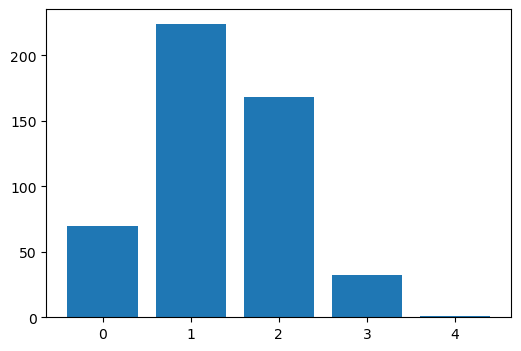

In [296]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);

---

## Problem 2 — Normal Distribution and Sample vs Population SD

**Objective:**  
Compare the behavior of the sample standard deviation (`ddof=1`) and population standard deviation (`ddof=0`) when sampling from a standard normal distribution.

**Key Concepts:**  
- Sampling variation  
- Bias in estimators  
- The effect of sample size on variability

**Steps:**  
1. Generate multiple samples from a standard normal distribution.  
2. Compute SDs using both `ddof=1` and `ddof=0`.  
3. Visualize the distributions with overlaid histograms.  
4. Interpret the differences and how they change with larger sample sizes.


## Problem 3 — Type II Error and t-Tests

**Objective:**  
Simulate the behavior of Type II errors in t-tests as the difference between population means increases.

**Key Concepts:**  
- Type I and Type II errors  
- Power of a statistical test  
- The relationship between effect size and error rates

**Steps:**  
1. Define a range of true mean differences (d = 0 to 1).  
2. Generate two samples for each d.  
3. Perform an independent t-test.  
4. Record how often the null hypothesis is not rejected.  
5. Plot the Type II error rate as a function of d.  
6. Discuss how power increases with effect size.

## Problem 4 — ANOVA vs Multiple t-Tests

**Objective:**  
Compare results from one-way ANOVA with results from multiple two-sample t-tests when analyzing group mean differences.

**Key Concepts:**  
- ANOVA as an omnibus test  
- Multiple comparisons problem  
- Controlling Type I error (family-wise error rate)

**Steps:**  
1. Generate three independent samples from normal distributions with different means.  
2. Run a one-way ANOVA.  
3. Perform pairwise t-tests (with and without correction).  
4. Compare results and conclusions.  
5. Explain why ANOVA is preferred before multiple t-tests.


In [297]:
import yfinance as yf